## Download prezzi stocks

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import yfinance as yf
from datetime import datetime
yf.pdr_override()
start_date = datetime(2010, 5, 16)  # Data di inizio
end_date = datetime(2024, 1, 17)

tickers = ['ACN', 'BABA', 'MPW', 'SRG.MI', "SNOW", 'DIS' , "EUNA.DE", "VWCE.DE"]

matrice_prezzi = pd.DataFrame()
for t in tickers:
    matrice_prezzi[t] = data.get_data_yahoo(t, start_date, end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
matrice_prezzi

,ACN,BABA,MPW,SRG.MI,SNOW,DIS,EUNA.DE,VWCE.DE
Date,,,,,,,,
2010-05-17,30.876364,NaN,3.679935,1.540679,NaN,29.692446,NaN,NaN
2010-05-18,30.442150,NaN,3.653542,1.574221,NaN,29.284389,NaN,NaN
2010-05-19,30.426640,NaN,3.630920,1.577574,NaN,28.989202,NaN,NaN
2010-05-20,29.434124,NaN,3.374531,1.559686,NaN,27.773726,NaN,NaN
2010-05-21,29.573702,NaN,3.472562,1.544033,NaN,28.537739,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-01-09,341.502960,72.019997,3.660000,4.821000,196.899994,89.669998,4.7035,107.139999
2024-01-10,344.073578,71.410004,3.640000,4.783000,197.399994,89.290001,4.7031,107.080002
2024-01-11,346.703979,72.379997,3.530000,4.751000,195.619995,89.449997,4.7003,106.739998


## Rendimenti:

#### Rendimenti annualizzati

In [3]:
from pypfopt.expected_returns import mean_historical_return

In [4]:
mean_historical_return(matrice_prezzi, returns_data=False, compounding=False, frequency=252, log_returns=False)

ACN        0.208285
BABA       0.054839
MPW        0.047315
SRG.MI     0.109725
SNOW       0.119651
DIS        0.117928
EUNA.DE   -0.008698
VWCE.DE    0.106007
dtype: float64

In [5]:
# rendimenti = (matrice_prezzi - matrice_prezzi.shift(1))/matrice_prezzi.shift(1)
rendimenti = matrice_prezzi.pct_change().dropna(how="all")
rendimenti_annuali = rendimenti.mean() * 252
rendimenti_annuali

ACN        0.208285
BABA       0.054839
MPW        0.047315
SRG.MI     0.109725
SNOW       0.119651
DIS        0.117928
EUNA.DE   -0.008698
VWCE.DE    0.106007
dtype: float64

#### Rendimenti logaritmici annualizzati

In [6]:
mean_historical_return(matrice_prezzi, returns_data=False, compounding=False, frequency=252, log_returns=True)

ACN        0.178594
BABA      -0.030951
MPW       -0.009330
SRG.MI     0.084332
SNOW      -0.090476
DIS        0.083700
EUNA.DE   -0.009663
VWCE.DE    0.090791
dtype: float64

In [7]:
# returns_log = np.log(matrice_prezzi).diff()
rendimenti_log = np.log(1 + matrice_prezzi.pct_change()).dropna(how="all")
rendimenti_log_annuali = rendimenti_log.mean() * 252
rendimenti_log_annuali

ACN        0.178594
BABA      -0.030951
MPW       -0.009330
SRG.MI     0.084332
SNOW      -0.090476
DIS        0.083700
EUNA.DE   -0.009663
VWCE.DE    0.090791
dtype: float64

## Varianza/Volatilità e rendimento del portafoglio complessivo

pesi trasposti * matrice di var e cov * pesi

#### Matrice di varianza e covarianza

In [8]:
from pypfopt.risk_models import risk_matrix
from pypfopt.risk_models import sample_cov
S = risk_matrix(matrice_prezzi, method='sample_cov')
S

,ACN,BABA,MPW,SRG.MI,SNOW,DIS,EUNA.DE,VWCE.DE
ACN,0.059280,0.034423,0.032743,0.015760,0.061506,0.033490,0.000808,0.029143
BABA,0.034423,0.174960,0.029699,0.014634,0.120718,0.032592,-0.000048,0.029612
MPW,0.032743,0.029699,0.110875,0.018184,0.047498,0.033945,0.001966,0.031212
SRG.MI,0.015760,0.014634,0.018184,0.050044,0.005896,0.015089,0.001397,0.022485
SNOW,0.061506,0.120718,0.047498,0.005896,0.423121,0.063407,0.005865,0.022823
DIS,0.033490,0.032592,0.033945,0.015089,0.063407,0.068489,0.000813,0.029604
EUNA.DE,0.000808,-0.000048,0.001966,0.001397,0.005865,0.000813,0.001929,0.000012
VWCE.DE,0.029143,0.029612,0.031212,0.022485,0.022823,0.029604,0.000012,0.030218


In [9]:
S = rendimenti.cov()*252
S

,ACN,BABA,MPW,SRG.MI,SNOW,DIS,EUNA.DE,VWCE.DE
ACN,0.059280,0.034423,0.032743,0.015760,0.061506,0.033490,0.000808,0.029143
BABA,0.034423,0.174960,0.029699,0.014634,0.120718,0.032592,-0.000048,0.029612
MPW,0.032743,0.029699,0.110875,0.018184,0.047498,0.033945,0.001966,0.031212
SRG.MI,0.015760,0.014634,0.018184,0.050044,0.005896,0.015089,0.001397,0.022485
SNOW,0.061506,0.120718,0.047498,0.005896,0.423121,0.063407,0.005865,0.022823
DIS,0.033490,0.032592,0.033945,0.015089,0.063407,0.068489,0.000813,0.029604
EUNA.DE,0.000808,-0.000048,0.001966,0.001397,0.005865,0.000813,0.001929,0.000012
VWCE.DE,0.029143,0.029612,0.031212,0.022485,0.022823,0.029604,0.000012,0.030218


#### Varianza e Volatilità complessiva con pesi attuali

In [10]:
diz_pesi = {'ACN': 0.21054, 'BABA': 0.05305, 'MPW': 0.0508 , 'SRG.MI': 0.07904, 'SNOW': 0.05645, 'DIS':  0.01335, 'EUNA.DE': 0.01525, 'VWCE.DE':0.52155}
pesi=np.array(list(diz_pesi.values()))
pesi

array([0.21054, 0.05305, 0.0508 , 0.07904, 0.05645, 0.01335, 0.01525,
       0.52155])

In [11]:
varianza_stocks = np.dot(pesi.T, np.dot(S, pesi ))
varianza_stocks

0.03196518898419219

In [12]:
volatilita_stocks = np.sqrt(varianza_stocks)
volatilita_stocks

0.1787881119766977

#### Rendimento complessivo con pesi attuali

In [13]:
rendimenti_stocks = (np.dot(rendimenti.mean() * 252, pesi))
rendimenti_stocks

0.12132190760830358

## Frontiera Efficiente

In [14]:
from pypfopt.risk_models import CovarianceShrinkage
# mu  --> Rendimenti annualizzati
# S . --> Matrice di Varianza e Covarianza
mu = mean_historical_return(matrice_prezzi, returns_data=False, compounding=False, frequency=252, log_returns=False)
S = CovarianceShrinkage(matrice_prezzi).ledoit_wolf()

In [15]:
mu

ACN        0.208285
BABA       0.054839
MPW        0.047315
SRG.MI     0.109725
SNOW       0.119651
DIS        0.117928
EUNA.DE   -0.008698
VWCE.DE    0.106007
dtype: float64

In [16]:
S

,ACN,BABA,MPW,SRG.MI,SNOW,DIS,EUNA.DE,VWCE.DE
ACN,0.059375,0.023016,0.032111,0.015455,0.014662,0.032843,0.000356,0.009333
BABA,0.023016,0.118225,0.019849,0.009783,0.028752,0.021782,-0.000020,0.009469
MPW,0.032111,0.019849,0.109974,0.017833,0.011283,0.033289,0.000868,0.009965
SRG.MI,0.015455,0.009783,0.017833,0.050318,0.001404,0.014798,0.000615,0.007201
SNOW,0.014662,0.028752,0.011283,0.001404,0.102152,0.015101,0.001395,0.005452
DIS,0.032843,0.021782,0.033289,0.014798,0.015101,0.068406,0.000359,0.009462
EUNA.DE,0.000356,-0.000020,0.000868,0.000615,0.001395,0.000359,0.002090,0.000002
VWCE.DE,0.009333,0.009469,0.009965,0.007201,0.005452,0.009462,0.000002,0.010930


In [17]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
# weights = ef.min_volatility()
# weights = ef.efficient_risk(0.1)
# weights = ef.efficient_return(0.10)
ef.portfolio_performance(verbose=True);

Expected annual return: 13.2%
Annual volatility: 11.5%
Sharpe Ratio: 0.97


In [18]:
weights

OrderedDict([('ACN', 0.2487657115409111),
             ('BABA', 0.0),
             ('MPW', 0.0),
             ('SRG.MI', 0.0369586488728222),
             ('SNOW', 0.0431874595310326),
             ('DIS', 0.0),
             ('EUNA.DE', 0.0),
             ('VWCE.DE', 0.6710881800552341)])

In [19]:
# Formula Sharpe Ratio =  (rendimento - risk_free_rate) / volatilità
(0.13245817323083192-0.02)/0.11525375374361067

0.9757441261392865

## Plotting

Grafico principale generando random portfolios

C:\Users\Libero\miniconda3\envs\finance\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


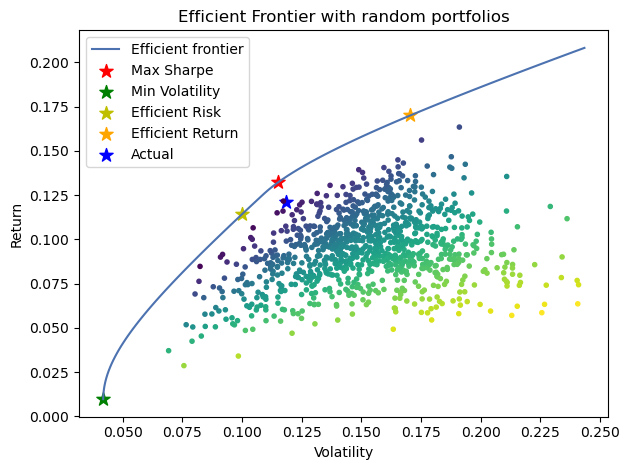

Pesi Max Sharpe:
ACN: 24.88% | BABA: 0.0% | MPW: 0.0% | SRG.MI: 3.7% | SNOW: 4.32% | DIS: 0.0% | EUNA.DE: 0.0% | VWCE.DE: 67.11% | 
Expected annual return: 13.2%
Annual volatility: 11.5%
Sharpe Ratio: 0.97


Pesi Portfolio Actual:
ACN: 21.05% | BABA: 5.3% | MPW: 5.08% | SRG.MI: 7.9% | SNOW: 5.64% | DIS: 1.33% | EUNA.DE: 1.52% | VWCE.DE: 52.15% | 
Expected annual return: 12.1%
Annual volatility: 11.8%
Sharpe Ratio: 0.86


Pesi Min Volatility:
ACN: 0.0% | BABA: 0.22% | MPW: 0.0% | SRG.MI: 0.17% | SNOW: 0.0% | DIS: 0.0% | EUNA.DE: 83.88% | VWCE.DE: 15.73% | 
Expected annual return: 1.0%
Annual volatility: 4.2%
Sharpe Ratio: -0.25


Pesi Efficient Risk:
ACN: 16.7% | BABA: 0.0% | MPW: 0.0% | SRG.MI: 4.32% | SNOW: 4.09% | DIS: 0.0% | EUNA.DE: 8.41% | VWCE.DE: 66.47% | 
Expected annual return: 11.4%
Annual volatility: 10.0%
Sharpe Ratio: 0.94


Pesi Efficient Return:
ACN: 62.19% | BABA: 0.0% | MPW: 0.0% | SRG.MI: 0.0% | SNOW: 2.81% | DIS: 0.0% | EUNA.DE: 0.0% | VWCE.DE: 35.0% | 
Expected annu

In [20]:
import matplotlib.pyplot as plt
from pypfopt import plotting

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
fig, ax = plt.subplots()

ef_max_sharpe = ef.deepcopy()
ef_min_volatility = ef.deepcopy()
ef_efficient_risk = ef.deepcopy()
ef_efficient_return = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio.
# Trova il massimo di sharpe. il calcolo usa la tasa libre de riesgo
weights_max_sharpe = ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Trovo il portafoglio con la minore volatilità
weights_min_volatility = ef_min_volatility.min_volatility()
ret_tangent, std_tangent, _  = ef_min_volatility.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="g", label="Min Volatility")

#Trovo il portafoglio con un livello di rischio
weights_efficient_risk = ef_efficient_risk.efficient_risk(0.10)
ret_tangent, std_tangent, _  = ef_efficient_risk.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="y", label="Efficient Risk")

#Trovo il portafoglio con un livello di rendimento
weights_efficient_return = ef_efficient_return.efficient_return(0.17)
ret_tangent, std_tangent, _  = ef_efficient_return.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="orange", label="Efficient Return")

# Portafoglio attuale
diz_pesi = {'ACN': 0.21054, 'BABA': 0.05305, 'MPW': 0.0508 , 'SRG.MI': 0.07904, 'SNOW': 0.05645, 'DIS':  0.01335, 'EUNA.DE': 0.01525, 'VWCE.DE':0.52155}
pesi=np.array(list(diz_pesi.values()))

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.add_constraint(lambda x: x == pesi)#assegno i pesi veri
ef_actual = ef.deepcopy()
weights_actual = ef_actual.max_sharpe()#trovo il max_sharpe per i pesi attuali.
ret_tangent, std_tangent, _ = ef_actual.portfolio_performance() #le performance coincidono con rendimenti_stocks e volatilita_stocks
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="b", label="Actual")

# Generate random portfolios
n_samples = 1000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds # !!! porque no resta la taso libre de riesgo?
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

print("Pesi Max Sharpe:")
for chiave, valore in weights_max_sharpe.items():
    print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
print()
ef_max_sharpe.portfolio_performance(verbose=True);

print("\n\nPesi Portfolio Actual:")
for chiave, valore in weights_actual.items():
    print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
print()
ef_actual.portfolio_performance(verbose=True)

print("\n\nPesi Min Volatility:")
for chiave, valore in weights_min_volatility.items():
    print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
print()
ef_min_volatility.portfolio_performance(verbose=True);

print("\n\nPesi Efficient Risk:")
for chiave, valore in weights_efficient_risk.items():
    print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
print()
ef_efficient_risk.portfolio_performance(verbose=True);

print("\n\nPesi Efficient Return:")
for chiave, valore in weights_efficient_return.items():
    print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
print()
ef_efficient_return.portfolio_performance(verbose=True);

In [21]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(matrice_prezzi)
da = DiscreteAllocation(weights_actual, latest_prices, total_portfolio_value=6200)
allocation, leftover = da.lp_portfolio()
print(allocation)

{'ACN': 4, 'BABA': 3, 'MPW': 94, 'SRG.MI': 99, 'SNOW': 2, 'DIS': 1, 'EUNA.DE': 19, 'VWCE.DE': 30}


C:\Users\Libero\miniconda3\envs\finance\lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
